<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Uttar%20Pradesh/SP_UttarPradesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 533 (delta 46), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (533/533), 24.49 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [57]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"sp up"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('SP_UttarPradesh.csv',index = False)

Streaming output truncated to the last 5000 lines.
39177
35945
0
<--------------------------------------------------->
2084
2020-11-16 14:44:12
1328348147094089729
False
now why are the sp*nish stans acting up again
futuresneedy
 | 20 | 
Twitter for Android
0
2120
255
0
<--------------------------------------------------->
2085
2020-11-16 14:44:01
1328348101636186113
False
Sale SP..insane..mkt up on hopes, economy will be close for some months...mkt higher than pre pandemic!@
FNaia2

Twitter for Android
0
18
65
0
<--------------------------------------------------->
2086
2020-11-16 14:40:03
1328347101038850049
False
Opening volatility! Gap up on $INO $HPR $GP Will it reverse today? https://t.co/kDKvo7vDI0 #stocks https://t.co/EzqjDGtyr2
stockmonitorapp
Global
FiltersDetected
0
1206
442
0
<--------------------------------------------------->
2087
2020-11-16 14:40:01
1328347094726295552
False
Priyanka to lead Congress’s solo campaign in 2022 UP Assembly election after SP rejects alliance

In [64]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2442 non-null   datetime64[ns]
 1   Tweet_id   2442 non-null   int64         
 2   Verified   2442 non-null   bool          
 3   Tweet      2442 non-null   object        
 4   User       2442 non-null   object        
 5   Location   2442 non-null   object        
 6   Source     2442 non-null   object        
 7   Likes      2442 non-null   int64         
 8   Followers  2442 non-null   int64         
 9   Following  2442 non-null   int64         
 10  Retweets   2442 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 193.3+ KB


In [66]:
df.shape

(2442, 11)

In [67]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [68]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [70]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [74]:
df['Source'].value_counts()

Twitter for iPhone                787
Twitter Web App                   691
Twitter for Android               634
Twitter for iPad                   38
TweetDeck                          33
                                 ... 
FantasyAlarm Auto Alarm Tweets      1
AdvisorStream v2                    1
iSpeedtestOS                        1
SimpleFX Blog                       1
                                    1
Name: Source, Length: 74, dtype: int64

In [75]:
df['Location'].nunique()

965

In [76]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

2442

In [77]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


2421

In [78]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [79]:
df['Tweet'].duplicated().sum()

21

In [80]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(2421, 11)

In [81]:
df['Tweet'].duplicated().sum()

0

In [82]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [83]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [84]:
df.shape

(2421, 12)

In [85]:
df['Processed_Tweet']

0       @haithamahmedmd Stretchy pants sales up @lulul...
1       Orlando City celebrates unlikely hero Rodrigo ...
2       #NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...
3       @WingsScotParty @scotmacscotbot Joanna Cherry ...
4                      @SP_Marc16  just agree and shut up
                              ...                        
2416    @chimpsea i live outside of philly and our cou...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419    @DragonLaw6 @Babs_SP He could open up a hospit...
2420    @Michael77013452 @jeremytrussell @Daniel_Props...
Name: Processed_Tweet, Length: 2421, dtype: object

In [86]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       @haithamahmedmd Stretchy pants sales up @lulul...
1       Orlando City celebrates unlikely hero Rodrigo ...
2       #NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...
3       @WingsScotParty @scotmacscotbot Joanna Cherry ...
4                      @SP_Marc16  just agree and shut up
                              ...                        
2416    @chimpsea i live outside of philly and our cou...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419    @DragonLaw6 @Babs_SP He could open up a hospit...
2420    @Michael77013452 @jeremytrussell @Daniel_Props...
Name: Processed_Tweet, Length: 2421, dtype: object

In [87]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                             Stretchy pants sales up   ?
1       Orlando City celebrates unlikely hero Rodrigo ...
2       #NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...
3           Joanna Cherry is perfect but you require a...
4                                  just agree and shut up
                              ...                        
2416      i live outside of philly and our county clos...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419        He could open up a hospital in Bolton and ...
2420            Buddy liking and retweeting yourself i...
Name: Processed_Tweet, Length: 2421, dtype: object

In [88]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                             Stretchy pants sales up   ?
1       Orlando City celebrates unlikely hero Rodrigo ...
2       #NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...
3           Joanna Cherry is perfect but you require a...
4                                  just agree and shut up
                              ...                        
2416      i live outside of philly and our county clos...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419        He could open up a hospital in Bolton and ...
2420            Buddy liking and retweeting yourself i...
Name: Processed_Tweet, Length: 2421, dtype: object

In [89]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                             Stretchy pants sales up   ?
1       Orlando City celebrates unlikely hero Rodrigo ...
2       NorthGaHSShowcase \n\nSt. Pius is up 33-27 aga...
3           Joanna Cherry is perfect but you require a...
4                                  just agree and shut up
                              ...                        
2416      i live outside of philly and our county clos...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419        He could open up a hospital in Bolton and ...
2420            Buddy liking and retweeting yourself i...
Name: Processed_Tweet, Length: 2421, dtype: object

In [29]:
!pip install tweet-preprocessor

In [90]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                               Stretchy pants sales up ?
1       Orlando City celebrates unlikely hero Rodrigo ...
2       NorthGaHSShowcase St. Pius is up -27 against D...
3       Joanna Cherry is perfect but you require a who...
4                                  just agree and shut up
                              ...                        
2416    i live outside of philly and our county closed...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419    He could open up a hospital in Bolton and make...
2420    Buddy liking and retweeting yourself is sp sad...
Name: Processed_Tweet, Length: 2421, dtype: object

In [31]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0                               Stretchy pants sales up  
1       Orlando City celebrates unlikely hero Rodrigo ...
2       NorthGaHSShowcase St  Pius is up     against D...
3       Joanna Cherry is perfect but you require a who...
4                                  just agree and shut up
                              ...                        
2416    i live outside of philly and our county closed...
2417                            HES SP CUTE IM TEARING UP
2418    Plato said that problems arise if you are not ...
2419    He could open up a hospital in Bolton and make...
2420    Buddy liking and retweeting yourself is sp sad...
Name: Processed_Tweet, Length: 2421, dtype: object

In [92]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0                               stretchy pants sales up ?
1       orlando city celebrates unlikely hero rodrigo ...
2       northgahsshowcase st. pius is up -27 against d...
3       joanna cherry is perfect but you require a who...
4                                  just agree and shut up
                              ...                        
2416    i live outside of philly and our county closed...
2417                            hes sp cute im tearing up
2418    plato said that problems arise if you are not ...
2419    he could open up a hospital in bolton and make...
2420    buddy liking and retweeting yourself is sp sad...
Name: Processed_Tweet, Length: 2421, dtype: object

In [94]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


'do they stay up all night talking to people they like and ignore that they have to pee or are starving or really should get to sleep? (not sp dom), are they intense &; obsessive? (sx), do they avoid being intense and obsessive (sx blind), do they openly dislike people in the -'

In [95]:
df['User'].value_counts()

Babs_SP           29
BigBaby_Sp        22
SP_Marc16         19
ifsweetmalik      16
sp_blodgett       15
                  ..
Pradeep_Mahaur     1
LouisSalerno7      1
BazookaBoy180      1
osgators           1
S4m_sp             1
Name: User, Length: 1896, dtype: int64

In [96]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


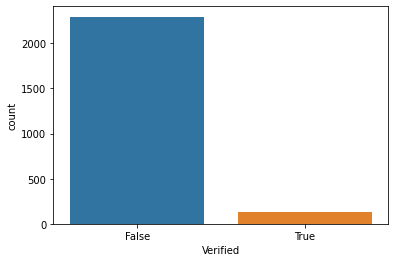

In [97]:
bar = sns.countplot(df['Verified'])

In [98]:
df['Verified'].value_counts()

False    2294
True      127
Name: Verified, dtype: int64

In [99]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

AmazonHelp         13
orlandosports       5
OmarKelly           4
JumiaKenya          4
SunSentinel         4
                   ..
ReutersBiz          1
Investingcom        1
republic            1
flipkartsupport     1
latestly            1
Name: User, Length: 87, dtype: int64

In [100]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 181, 16: 396, 17: 409, 18: 373, 19: 387, 20: 402, 21: 273})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

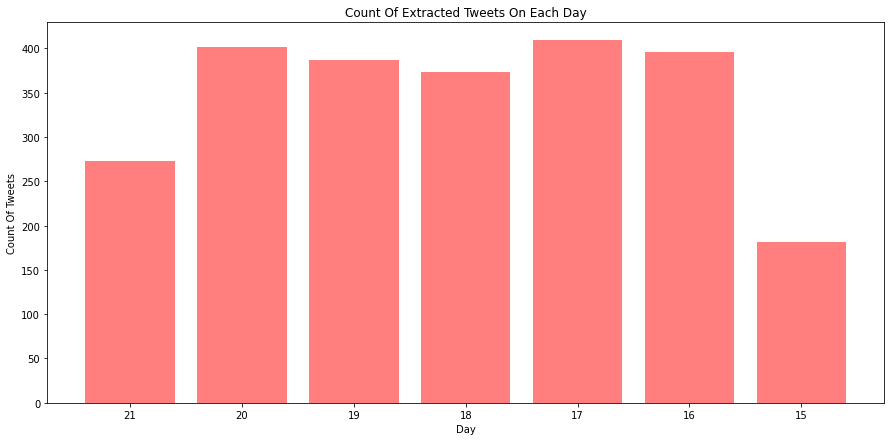

In [101]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [102]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 105,
         1: 81,
         2: 77,
         3: 55,
         4: 59,
         5: 56,
         6: 50,
         7: 77,
         8: 64,
         9: 73,
         10: 74,
         11: 78,
         12: 95,
         13: 128,
         14: 161,
         15: 169,
         16: 144,
         17: 132,
         18: 153,
         19: 117,
         20: 119,
         21: 127,
         22: 141,
         23: 86})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

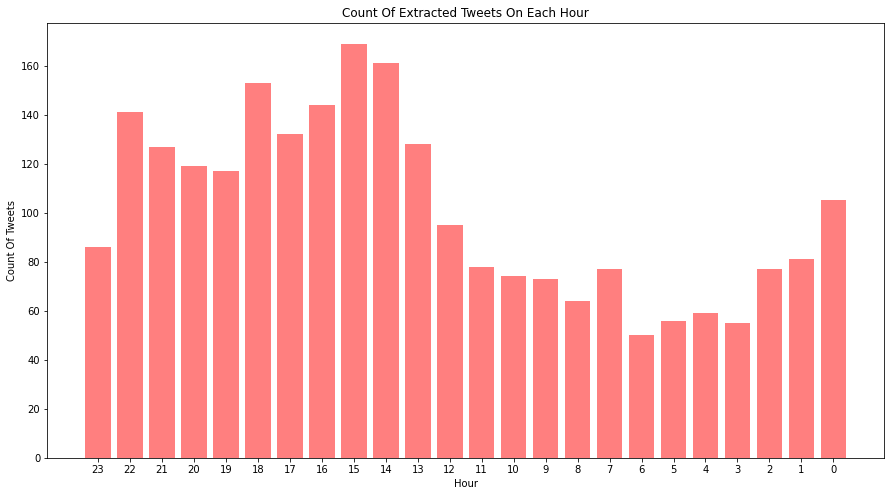

In [104]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [105]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [106]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['having', "mightn't", 'how', 'when', 'our', "doesn't", 'them', 'at', "should've", 'are', 'wasn', "don't", 'from', 'as', 'ain', 'her', 'or', 'most', 'haven', 'him', 'himself', 'out', 'am', 'more', 'against', 'the', 'while', "you'll", 'do', 'once', "couldn't", 'being', 'below', 'and', 'on', "haven't", "she's", 'be', 'few', 'their', "mustn't", 'same', 'don', 'your', 'won', "shouldn't", 'myself', 're', "isn't", 'nor', 'it', 'above', 'other', 'so', 'about', 'for', 'this', 'after', 'was', 'yours', 'yourself', 'she', 'my', 'any', 'is', "you've", 'each', 'you', 'only', 'couldn', 'ma', 'should', 'to', 'doesn', 'll', 'has', 'he', 'herself', 'they', 'because', 'down', 'its', 'will', 'those', 'of', 'can', 'an', 'yourselves', 'these', 'with', 'through', "you're", "didn't", 'were', 'hadn', 'during', 'aren', "shan't", 'then', 'mightn', "wouldn't", 'again', 'further', 'isn', "needn't", 'both', 'such', "won't", 'hers', 'y', 'did', "that'll", 'mustn', 'by', 'shouldn', 'have', 'no', 'not', 'me', 'needn'

In [108]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                                  stretchy pants sales ?
1       orlando city celebrates unlikely hero rodrigo ...
2       northgahsshowcase st. pius -27 duluth going ha...
3       joanna cherry perfect require whole negation t...
4                                              agree shut
                              ...                        
2416    live outside philly county closed us person in...
2417                               hes sp cute im tearing
2418    plato said problems arise proper position soci...
2419             could open hospital bolton make millions
2420    buddy liking retweeting sp sad. need recogniti...
Name: Processed_Tweet, Length: 2421, dtype: object

In [109]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                             [stretchy, pants, sales, ?]
1       [orlando, city, celebrates, unlikely, hero, ro...
2       [northgahsshowcase, st, ., pius, -, 27, duluth...
3       [joanna, cherry, perfect, require, whole, nega...
4                                           [agree, shut]
                              ...                        
2416    [live, outside, philly, county, closed, us, pe...
2417                         [hes, sp, cute, im, tearing]
2418    [plato, said, problems, arise, proper, positio...
2419      [could, open, hospital, bolton, make, millions]
2420    [buddy, liking, retweeting, sp, sad, ., need, ...
Name: Processed_Tweet, Length: 2421, dtype: object

In [110]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0                               [stretchi, pant, sale, ?]
1       [orlando, citi, celebr, unlik, hero, rodrigo, ...
2       [northgahsshowcas, st, ., piu, -, 27, duluth, ...
3       [joanna, cherri, perfect, requir, whole, negat...
4                                            [agre, shut]
                              ...                        
2416    [live, outsid, philli, counti, close, us, pers...
2417                             [he, sp, cute, im, tear]
2418    [plato, said, problem, aris, proper, posit, so...
2419         [could, open, hospit, bolton, make, million]
2420    [buddi, like, retweet, sp, sad, ., need, recog...
Name: Processed_Tweet, Length: 2421, dtype: object

In [111]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:52:01,1330297950619185154,False,@haithamahmedmd Stretchy pants sales up @lulul...,SP_Pind,"Ontario, Canada",Twitter for iPhone,0,504,589,0,"[stretchi, pant, sale]"
1,2020-11-21 23:49:29,1330297312900427777,True,Orlando City celebrates unlikely hero Rodrigo ...,osiliana,"Orlando, Florida",Twitter Web App,4,3853,3317,0,"[orlando, citi, celebr, unlik, hero, rodrigo, ..."
2,2020-11-21 23:44:31,1330296059772407816,False,#NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...,northgareport,"Georgia, USA",Twitter for iPhone,0,2153,2606,0,"[northgahsshowcas, piu, duluth, halftim, brook..."
3,2020-11-21 23:43:02,1330295689511886857,False,@WingsScotParty @scotmacscotbot Joanna Cherry ...,ga11acher,,Twitter Web App,11,3841,3155,2,"[joanna, cherri, perfect, requir, whole, negat..."
4,2020-11-21 23:38:39,1330294587135504388,False,@SP_Marc16 😭😭😭 just agree and shut up,Cheaper2beepher,Uptown Girl,Twitter for iPad,0,561,611,0,"[agre, shut]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2416,2020-11-15 12:01:35,1327944836666822656,False,@chimpsea i live outside of philly and our cou...,kaytea1225,,Twitter for iPhone,0,61,376,0,"[live, outsid, philli, counti, close, person, ..."
2417,2020-11-15 11:59:16,1327944250730934272,False,HES SP CUTE IM TEARING UP,megaliotath,17 || 🇬🇷,Twitter for Android,0,9,20,0,"[cute, tear]"
2418,2020-11-15 11:57:15,1327943744612560903,False,Plato said that problems arise if you are not ...,elliessi_,Republic of the Philippines,Twitter for Android,0,42,95,0,"[plato, said, problem, aris, proper, posit, so..."
2419,2020-11-15 11:56:02,1327943436943716353,False,@DragonLaw6 @Babs_SP He could open up a hospit...,GlazZaGIaz,,Twitter for iPhone,1,1489,886,0,"[could, open, hospit, bolton, make, million]"


In [112]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

34964

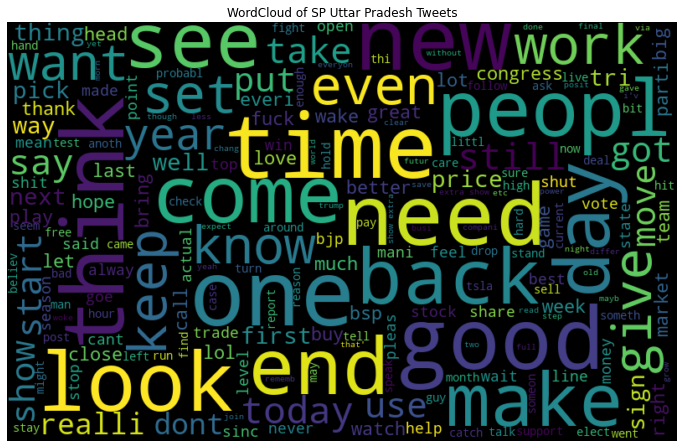

In [113]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of SP Uttar Pradesh Tweets")
plt.show()

In [114]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

2421

In [115]:
len(text)

34964

In [116]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 1029
Negative Tweets: 483
Neutral Tweets 909


In [117]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [119]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.622,0.378,0.8074
2,0.000,1.000,0.000,0.0000
3,0.078,0.729,0.193,0.4939
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
2416,0.000,1.000,0.000,0.0000
2417,0.000,0.250,0.750,0.4588
2418,0.383,0.617,0.000,-0.7351
2419,0.000,1.000,0.000,0.0000


In [120]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.622,0.378,0.8074,Positive
2,0.000,1.000,0.000,0.0000,Neutral
3,0.078,0.729,0.193,0.4939,Positive
4,0.000,1.000,0.000,0.0000,Neutral


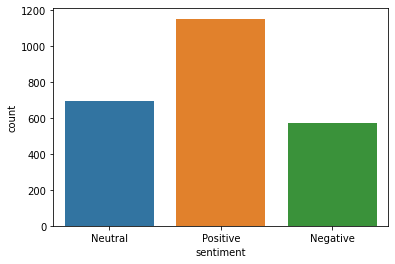

In [121]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [122]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Uttar Pradesh/SP_UttarPradesh.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

3993

In [124]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [126]:
word_emotion=dict()
for i in range(0,3993):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [127]:
from numpy import nan
nan == nan


False

In [128]:
for i in range(0,2421):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [129]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

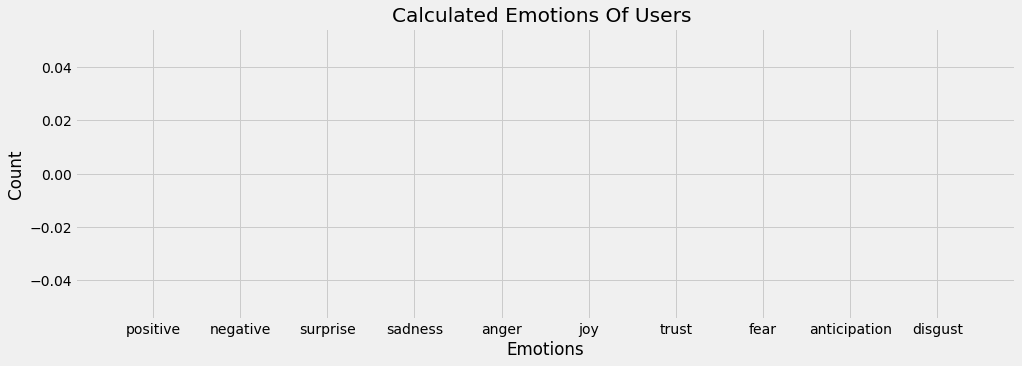

In [130]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [131]:
df.Location  = df.Location.fillna('India')
f = [i for i in df['Location'] if type(i) != str]
f

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[]

In [132]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                      770
London                 40
India                  34
USA                    32
Drexel Hill, PA        22
                     ... 
Bushwick, New York      1
Dreamland               1
All pronouns || 🇵🇭      1
New York City           1
Norwich                 1
Name: Location, Length: 964, dtype: int64

In [133]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:52:01,1330297950619185154,False,@haithamahmedmd Stretchy pants sales up @lulul...,SP_Pind,"Ontario, Canada",Twitter for iPhone,0,504,589,0,"[stretchi, pant, sale]",Ontario
1,2020-11-21 23:49:29,1330297312900427777,True,Orlando City celebrates unlikely hero Rodrigo ...,osiliana,"Orlando, Florida",Twitter Web App,4,3853,3317,0,"[orlando, citi, celebr, unlik, hero, rodrigo, ...",Orlando
2,2020-11-21 23:44:31,1330296059772407816,False,#NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...,northgareport,"Georgia, USA",Twitter for iPhone,0,2153,2606,0,"[northgahsshowcas, piu, duluth, halftim, brook...",Georgia
3,2020-11-21 23:43:02,1330295689511886857,False,@WingsScotParty @scotmacscotbot Joanna Cherry ...,ga11acher,,Twitter Web App,11,3841,3155,2,"[joanna, cherri, perfect, requir, whole, negat...",
4,2020-11-21 23:38:39,1330294587135504388,False,@SP_Marc16 😭😭😭 just agree and shut up,Cheaper2beepher,Uptown Girl,Twitter for iPad,0,561,611,0,"[agre, shut]",Uptown Girl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,2020-11-15 12:01:35,1327944836666822656,False,@chimpsea i live outside of philly and our cou...,kaytea1225,,Twitter for iPhone,0,61,376,0,"[live, outsid, philli, counti, close, person, ...",
2417,2020-11-15 11:59:16,1327944250730934272,False,HES SP CUTE IM TEARING UP,megaliotath,17 || 🇬🇷,Twitter for Android,0,9,20,0,"[cute, tear]",17 || 🇬🇷
2418,2020-11-15 11:57:15,1327943744612560903,False,Plato said that problems arise if you are not ...,elliessi_,Republic of the Philippines,Twitter for Android,0,42,95,0,"[plato, said, problem, aris, proper, posit, so...",Republic of the Philippines
2419,2020-11-15 11:56:02,1327943436943716353,False,@DragonLaw6 @Babs_SP He could open up a hospit...,GlazZaGIaz,,Twitter for iPhone,1,1489,886,0,"[could, open, hospit, bolton, make, million]",


In [134]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:52:01,1330297950619185154,False,@haithamahmedmd Stretchy pants sales up @lulul...,SP_Pind,"Ontario, Canada",Twitter for iPhone,0,504,589,0,"[stretchi, pant, sale]",Ontario,Neutral,21
1,2020-11-21 23:49:29,1330297312900427777,True,Orlando City celebrates unlikely hero Rodrigo ...,osiliana,"Orlando, Florida",Twitter Web App,4,3853,3317,0,"[orlando, citi, celebr, unlik, hero, rodrigo, ...",Orlando,Positive,21
2,2020-11-21 23:44:31,1330296059772407816,False,#NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...,northgareport,"Georgia, USA",Twitter for iPhone,0,2153,2606,0,"[northgahsshowcas, piu, duluth, halftim, brook...",Georgia,Neutral,21
3,2020-11-21 23:43:02,1330295689511886857,False,@WingsScotParty @scotmacscotbot Joanna Cherry ...,ga11acher,,Twitter Web App,11,3841,3155,2,"[joanna, cherri, perfect, requir, whole, negat...",,Positive,21
4,2020-11-21 23:38:39,1330294587135504388,False,@SP_Marc16 😭😭😭 just agree and shut up,Cheaper2beepher,Uptown Girl,Twitter for iPad,0,561,611,0,"[agre, shut]",Uptown Girl,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


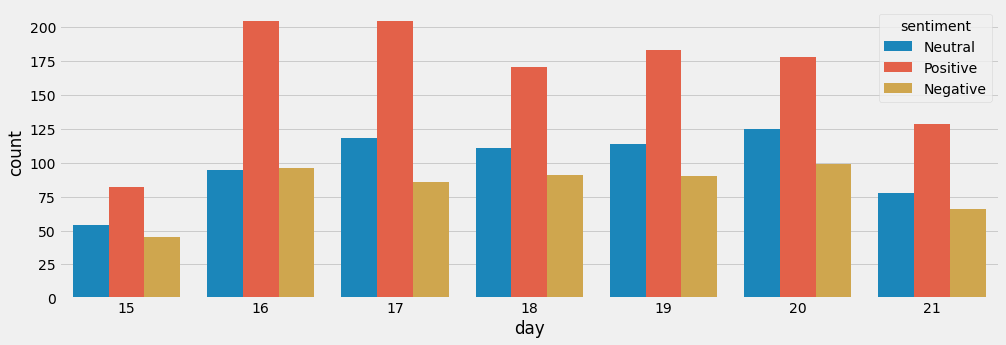

In [136]:
sns.countplot(df['day'],hue = df['sentiment'])

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [138]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:52:01,1330297950619185154,False,@haithamahmedmd Stretchy pants sales up @lulul...,SP_Pind,"Ontario, Canada",Twitter for iPhone,0,504,589,0,"[stretchi, pant, sale]",Ontario,Neutral,21,1
1,2020-11-21 23:49:29,1330297312900427777,True,Orlando City celebrates unlikely hero Rodrigo ...,osiliana,"Orlando, Florida",Twitter Web App,4,3853,3317,0,"[orlando, citi, celebr, unlik, hero, rodrigo, ...",Orlando,Positive,21,2
2,2020-11-21 23:44:31,1330296059772407816,False,#NorthGaHSShowcase \n\nSt. Pius is up 33-27 ag...,northgareport,"Georgia, USA",Twitter for iPhone,0,2153,2606,0,"[northgahsshowcas, piu, duluth, halftim, brook...",Georgia,Neutral,21,1
3,2020-11-21 23:43:02,1330295689511886857,False,@WingsScotParty @scotmacscotbot Joanna Cherry ...,ga11acher,,Twitter Web App,11,3841,3155,2,"[joanna, cherri, perfect, requir, whole, negat...",,Positive,21,2
4,2020-11-21 23:38:39,1330294587135504388,False,@SP_Marc16 😭😭😭 just agree and shut up,Cheaper2beepher,Uptown Girl,Twitter for iPad,0,561,611,0,"[agre, shut]",Uptown Girl,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416,2020-11-15 12:01:35,1327944836666822656,False,@chimpsea i live outside of philly and our cou...,kaytea1225,,Twitter for iPhone,0,61,376,0,"[live, outsid, philli, counti, close, person, ...",,Neutral,15,1
2417,2020-11-15 11:59:16,1327944250730934272,False,HES SP CUTE IM TEARING UP,megaliotath,17 || 🇬🇷,Twitter for Android,0,9,20,0,"[cute, tear]",17 || 🇬🇷,Positive,15,2
2418,2020-11-15 11:57:15,1327943744612560903,False,Plato said that problems arise if you are not ...,elliessi_,Republic of the Philippines,Twitter for Android,0,42,95,0,"[plato, said, problem, aris, proper, posit, so...",Republic of the Philippines,Negative,15,0
2419,2020-11-15 11:56:02,1327943436943716353,False,@DragonLaw6 @Babs_SP He could open up a hospit...,GlazZaGIaz,,Twitter for iPhone,1,1489,886,0,"[could, open, hospit, bolton, make, million]",,Neutral,15,1


In [139]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [141]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [142]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [143]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7138927097661623
Precision Score:  0.7138927097661623
Recall Score:  0.7138927097661623
F1 Score:  0.7138927097661623


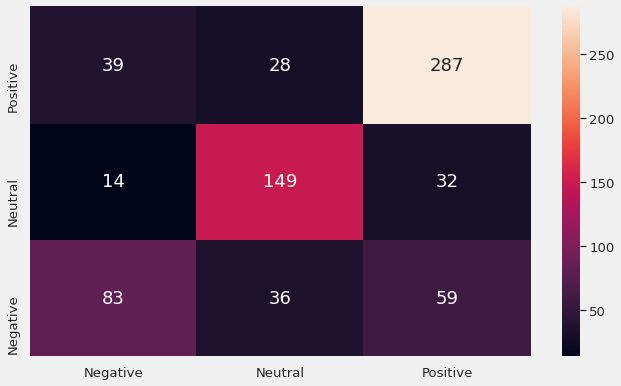

In [144]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [145]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [146]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [147]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4982144100243649
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [148]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.469050894085282
Precision Score:  0.469050894085282
Recall Score:  0.469050894085282
F1 Score:  0.469050894085282


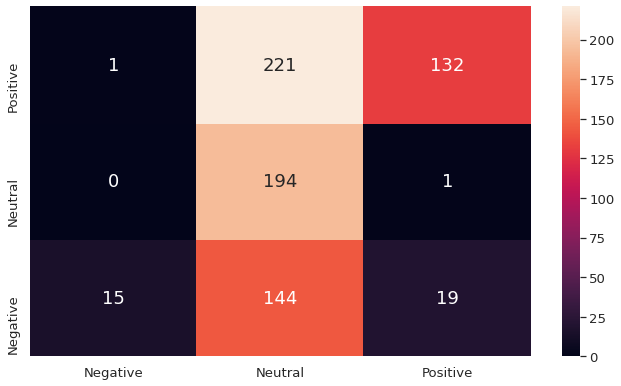

In [149]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [150]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [151]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7414030261348006
Precision Score:  0.7414030261348006
Recall Score:  0.7414030261348006
F1 Score:  0.7414030261348006


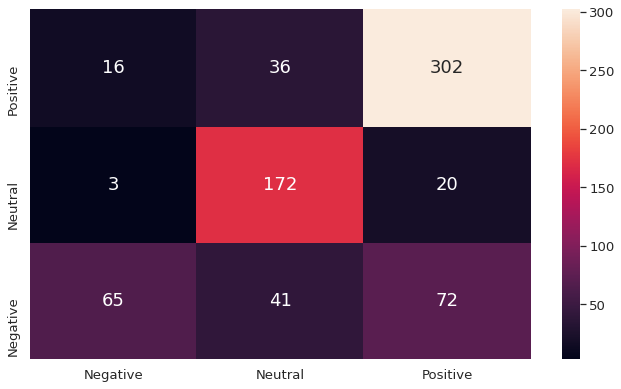

In [152]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [153]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [154]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, max_depth=6, criterion=entropy, score=0.504, total=   2.9s
[CV] n_estimators=800, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=800, max_depth=6, criterion=entropy, score=0.493, total=   3.1s
[CV] n_estimators=800, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=800, max_depth=6, criterion=entropy, score=0.481, total=   3.1s
[CV] n_estimators=800, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s remaining:    0.0s


[CV]  n_estimators=800, max_depth=6, criterion=entropy, score=0.493, total=   3.6s
[CV] n_estimators=800, max_depth=6, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s remaining:    0.0s


[CV]  n_estimators=800, max_depth=6, criterion=entropy, score=0.488, total=   3.6s
[CV] n_estimators=100, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=entropy, score=0.552, total=   0.8s
[CV] n_estimators=100, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.0s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=entropy, score=0.563, total=   0.8s
[CV] n_estimators=100, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   17.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=entropy, score=0.531, total=   0.8s
[CV] n_estimators=100, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.6s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=entropy, score=0.566, total=   0.7s
[CV] n_estimators=100, max_depth=17, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.3s remaining:    0.0s


[CV]  n_estimators=100, max_depth=17, criterion=entropy, score=0.538, total=   0.7s
[CV] n_estimators=500, max_depth=19, criterion=gini ..................
[CV]  n_estimators=500, max_depth=19, criterion=gini, score=0.552, total=   3.4s
[CV] n_estimators=500, max_depth=19, criterion=gini ..................
[CV]  n_estimators=500, max_depth=19, criterion=gini, score=0.552, total=   3.4s
[CV] n_estimators=500, max_depth=19, criterion=gini ..................
[CV]  n_estimators=500, max_depth=19, criterion=gini, score=0.540, total=   3.3s
[CV] n_estimators=500, max_depth=19, criterion=gini ..................
[CV]  n_estimators=500, max_depth=19, criterion=gini, score=0.575, total=   3.8s
[CV] n_estimators=500, max_depth=19, criterion=gini ..................
[CV]  n_estimators=500, max_depth=19, criterion=gini, score=0.574, total=   3.5s
[CV] n_estimators=1000, max_depth=10, criterion=entropy ..............
[CV]  n_estimators=1000, max_depth=10, criterion=entropy, score=0.522, total=   4.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished


0.5584507165174286
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [155]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5914718019257221
Precision Score:  0.5914718019257221
Recall Score:  0.5914718019257221
F1 Score:  0.5914718019257221


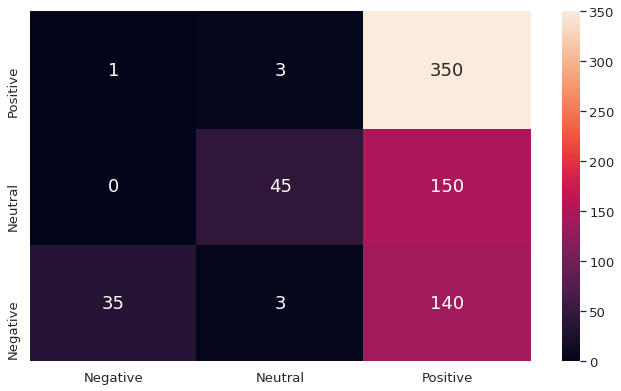

In [156]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [157]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6134800550206327
Precision Score:  0.6134800550206327
Recall Score:  0.6134800550206327
F1 Score:  0.6134800550206327


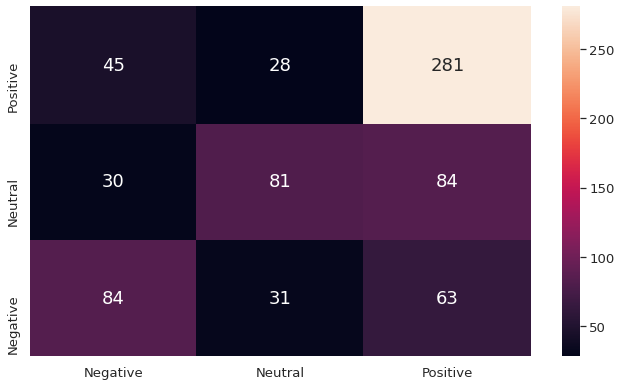

In [158]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [159]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [160]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6328019491820397
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [161]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6341127922971114
Precision Score:  0.6341127922971114
Recall Score:  0.6341127922971114
F1 Score:  0.6341127922971114


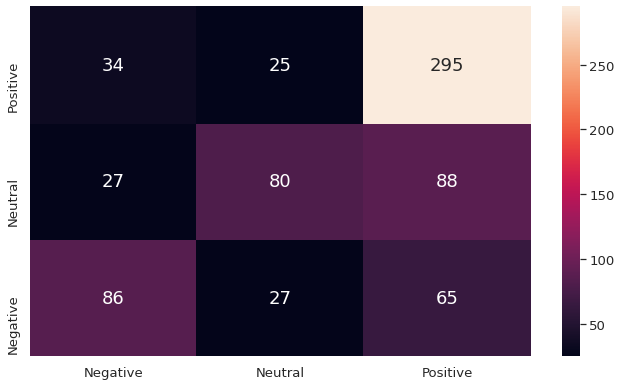

In [162]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

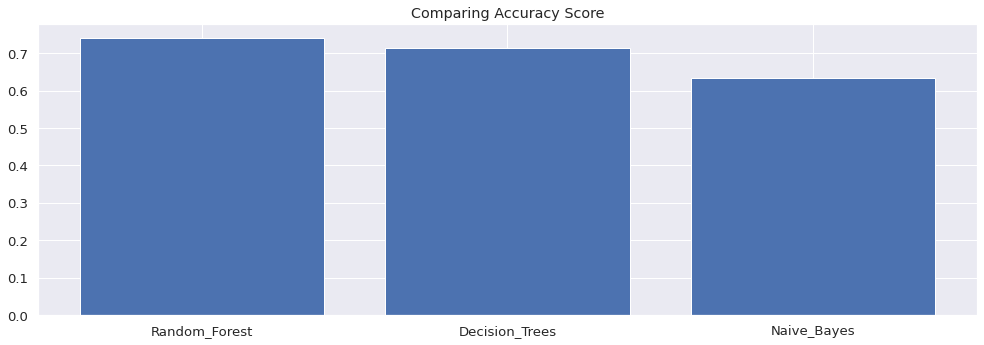

In [163]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

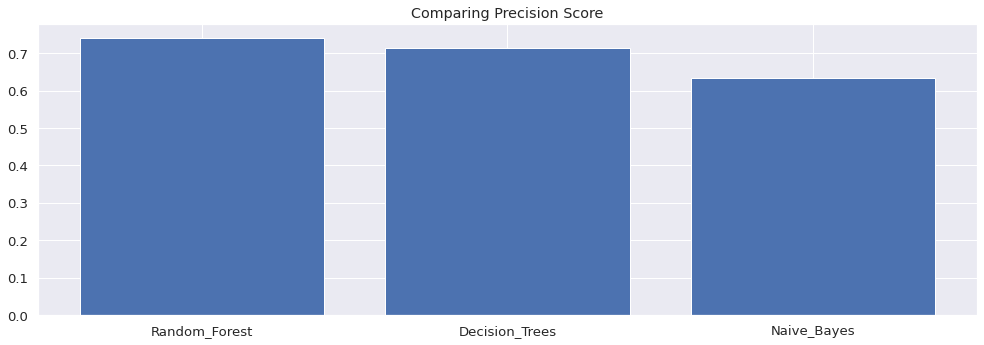

In [164]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

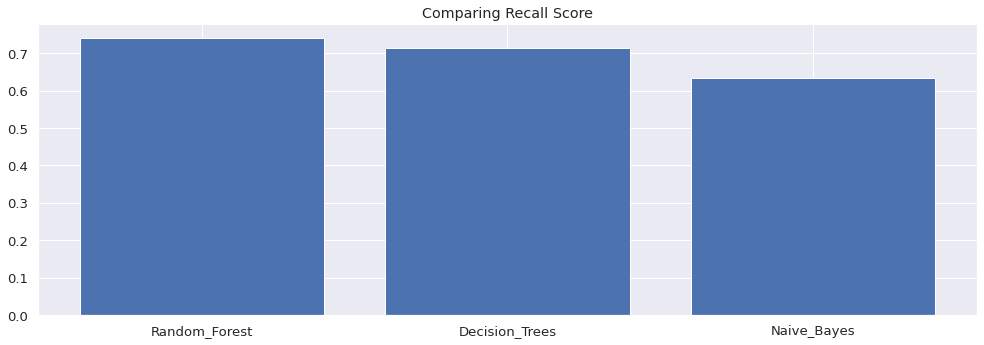

In [165]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

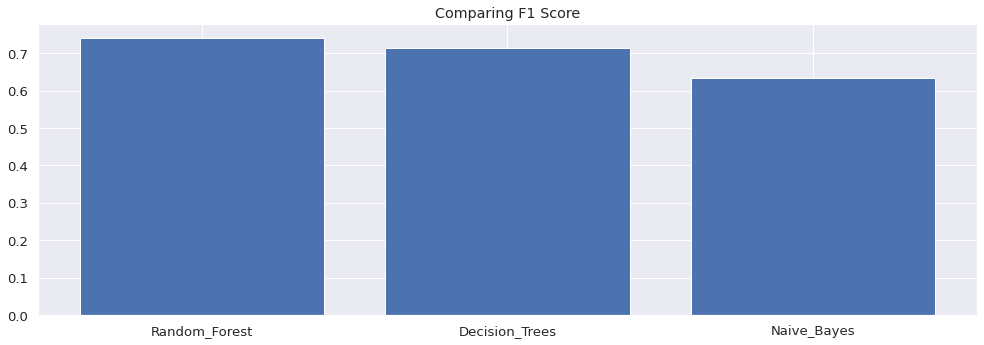

In [166]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()